In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
from zipfile import ZipFile

dataset = '/kaggle/input/dogs-vs-cats/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
from zipfile import ZipFile

dataset_test = '/kaggle/input/dogs-vs-cats/test.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import os
import cv2

path_dir = '/kaggle/working/train/'

img_arr = []
labels = []
recog = []


count = 0
for img in os.listdir(path_dir):
    if count==2000:
        break
    animal = img.split('.')[0]
    if animal == 'cat':
        labels.append(1)
    else:
        labels.append(0)
    recog.append(img.split('.')[1])
    
    img = cv2.imread(path_dir+img)
    img = np.array(img)
    resized_image = cv2.resize(img, (224, 224))


    if resized_image.shape[-1] == 1:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2BGR)

    img_arr.append(resized_image)
    
    count+=1
    
    

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_arr, labels, random_state = 42)

In [6]:
print(len(x_train), len(y_train))

1500 1500


In [7]:
print(len(x_test), len(y_test))

500 500


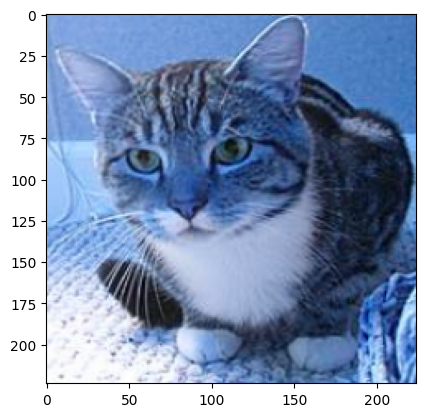

In [8]:
import matplotlib.pyplot as plt


plt.imshow(x_train[0])
plt.show()

In [9]:
#0 -> dog
#1 ->cat 

In [10]:
x_train = np.array(x_train)
x_test= np.array(x_test)

print(x_train.shape)
print(x_test.shape)

(1500, 224, 224, 3)
(500, 224, 224, 3)


In [11]:
import tensorflow as tf
import tensorflow_hub as hub

In [12]:
x_train_scaled = x_train/255.0    
x_test_scaled = x_test/255.0

In [13]:
resnet_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'

pretrained_model = hub.KerasLayer(resnet_model, input_shape=(224, 224, 3), trainable=False)


In [22]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',  # You can choose a different optimizer
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])

In [24]:
type(x_train), type(y_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
from keras.callbacks import EarlyStopping

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train_scaled, y_train, epochs=4, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/4
38/38 [==============================] - 122s 3s/step - loss: 0.2514 - accuracy: 0.8975 - val_loss: 0.0845 - val_accuracy: 0.9667
Epoch 2/4
38/38 [==============================] - 116s 3s/step - loss: 0.0704 - accuracy: 0.9758 - val_loss: 0.0637 - val_accuracy: 0.9733
Epoch 3/4
38/38 [==============================] - 117s 3s/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0584 - val_accuracy: 0.9800
Epoch 4/4
38/38 [==============================] - 118s 3s/step - loss: 0.0377 - accuracy: 0.9892 - val_loss: 0.0564 - val_accuracy: 0.9767


In [27]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

16/16 [==============================] - 39s 2s/step - loss: 0.0459 - accuracy: 0.9880
Test Loss = 0.04593851417303085
Test Accuracy = 0.9879999756813049


In [19]:
# x_train[0]

In [20]:
len(y_test)

500